Importing the necessaries libraries to work with

In [86]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import cluster

Reading the data

In [12]:
dataSet = pd.read_csv("Guilherme Antonio Aguiar Pessanha Santos - vehicle_1Mb.csv")
dataSet.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,58589,7303354444,https://slo.craigslist.org/cto/d/nipomo-2008-f...,san luis obispo,https://slo.craigslist.org,7000,2008.0,ford,f150,good,...,NaN,pickup,NaN,https://images.craigslist.org/00w0w_abA4EveUZw...,This is a Green 2008 FORD F-150 XL 4 DOOR ext...,NaN,ca,350.298,-1.204.894,2021-04-07T14:28:18-0700
1,98736,7314126068,https://jacksonville.craigslist.org/cto/d/sain...,jacksonville,https://jacksonville.craigslist.org,17500,2016.0,bmw,328i,like new,...,mid-size,sedan,blue,https://images.craigslist.org/00e0e_fks755tyfI...,2016 Bmw 328i. 63000 miles. Second owner. Serv...,NaN,fl,300.815,-815.477,2021-04-28T20:14:28-0400
2,401980,7303685904,https://bellingham.craigslist.org/ctd/d/puyall...,bellingham,https://bellingham.craigslist.org,44999,2019.0,ram,1500,NaN,...,NaN,truck,white,https://images.craigslist.org/00U0U_iIvcoJZBwq...,Joydrive: 253-201-0804 https://joydrive.com/...,NaN,wa,471.991,-1.223.151,2021-04-08T09:17:55-0700
3,257546,7311166305,https://southjersey.craigslist.org/cto/d/egg-h...,south jersey,https://southjersey.craigslist.org,3990,2002.0,honda,cr-v,good,...,NaN,NaN,NaN,https://images.craigslist.org/01717_eNGBPppC61...,"2002 Honda CR-V 6 cylinder, FWD Clean title. ...",NaN,nj,393.741,-746.118,2021-04-22T21:15:18-0400
4,188630,7313149322,https://capecod.craigslist.org/ctd/d/cohoes-20...,cape cod / islands,https://capecod.craigslist.org,23900,2016.0,rover,discovery sport,excellent,...,full-size,SUV,black,https://images.craigslist.org/00R0R_7QyHgQgUd0...,2016 Land Rover Discovery Sport AWD 4dr HSE - ...,NaN,ma,42.777.828,-7.374.899,2021-04-26T21:23:07-0400


Seeing its info

In [13]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    304 non-null    int64  
 1   id            304 non-null    int64  
 2   url           304 non-null    object 
 3   region        304 non-null    object 
 4   region_url    304 non-null    object 
 5   price         304 non-null    int64  
 6   year          304 non-null    float64
 7   manufacturer  296 non-null    object 
 8   model         304 non-null    object 
 9   condition     192 non-null    object 
 10  cylinders     182 non-null    object 
 11  fuel          302 non-null    object 
 12  odometer      297 non-null    float64
 13  title_status  295 non-null    object 
 14  transmission  301 non-null    object 
 15  VIN           200 non-null    object 
 16  drive         210 non-null    object 
 17  size          89 non-null     object 
 18  type          243 non-null    

The features of numbers 0, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 24, 25 have data missing init. I will remove the feature of number 2 because it only has 1 non-Null sata init

Discrbing the features

In [56]:
dataSet.describe()

,Unnamed: 0,id,price,year,odometer,county
count,304.000000,3.040000e+02,304.000000,304.000000,2.970000e+02,0.0
mean,207976.680921,7.311443e+09,17330.210526,2011.105263,9.470059e+04,NaN
std,119573.752387,4.503619e+06,15122.034717,10.597750,8.684085e+04,NaN
min,2933.000000,7.301662e+09,0.000000,1923.000000,1.000000e+00,NaN
25%,98635.500000,7.307754e+09,5971.250000,2009.000000,3.890700e+04,NaN
50%,208630.000000,7.312816e+09,13998.000000,2014.000000,8.700000e+04,NaN
75%,311334.750000,7.315379e+09,25990.000000,2017.000000,1.320000e+05,NaN
max,426484.000000,7.317033e+09,90500.000000,2021.000000,1.111111e+06,NaN


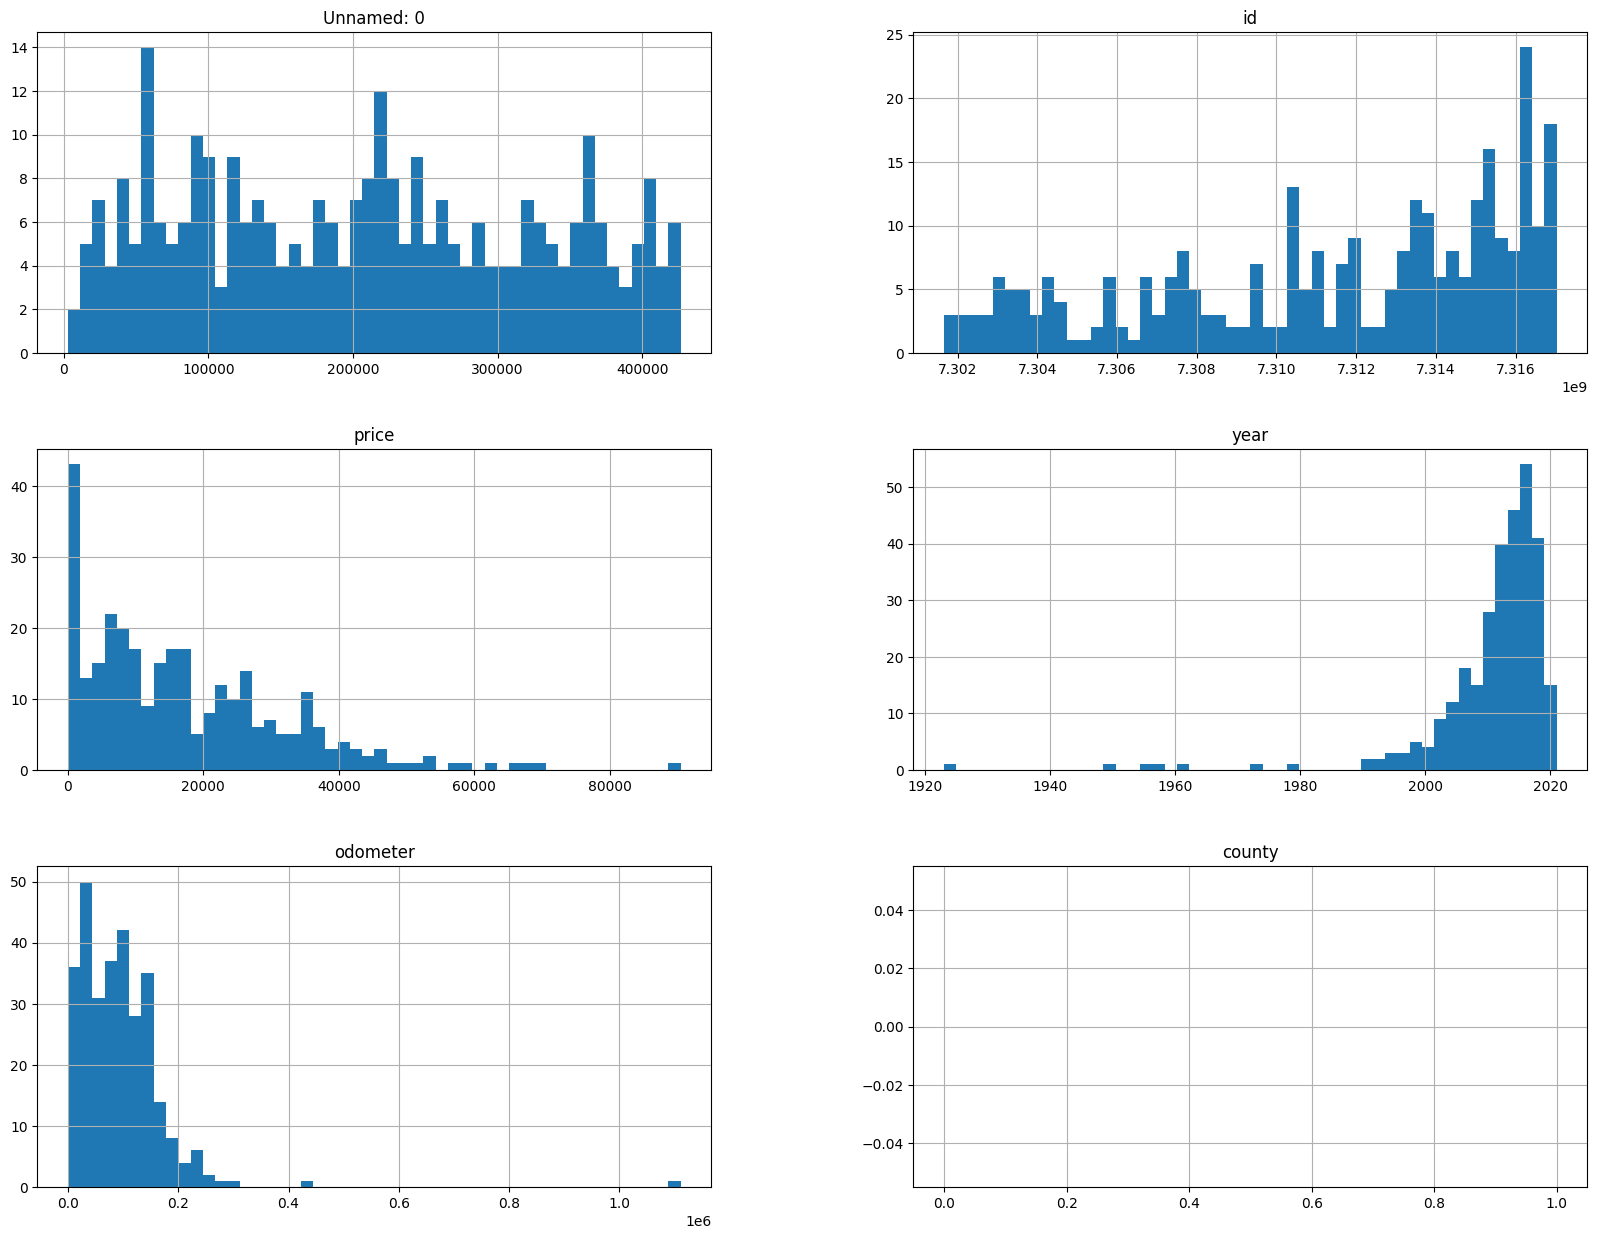

In [59]:
#histogram for all numeric features
dataSet.hist(bins=50, figsize=(20,15))
plt.show()

The feature of number 22 which doesn't have any data init 

In [17]:
dataSet["county"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
299   NaN
300   NaN
301   NaN
302   NaN
303   NaN
Name: county, Length: 304, dtype: float64

In [20]:
dataSet["size"]

0            NaN
1       mid-size
2            NaN
3            NaN
4      full-size
         ...    
299          NaN
300          NaN
301          NaN
302          NaN
303          NaN
Name: size, Length: 304, dtype: object

The feature is county and only has one non-null data, so now i will remove the the feature from the dataSet 

In [21]:
dataSet["size"].keys()


RangeIndex(start=0, stop=304, step=1)

In [93]:
dataSet_cleaned = dataSet.copy()
# dataSet1.drop("county",axis = 22)
# deleting the irrelevants features
dataSet_cleaned.drop(["Unnamed: 0","county", "size", "id", "url", "region_url", "VIN", "image_url", "description", "posting_date"], axis = 1, inplace= True)
dataSet_cleaned

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,san luis obispo,7000,2008.0,ford,f150,good,NaN,gas,265000.0,clean,automatic,NaN,pickup,NaN,ca,350.298,-1.204.894
1,jacksonville,17500,2016.0,bmw,328i,like new,4 cylinders,gas,63030.0,clean,automatic,rwd,sedan,blue,fl,300.815,-815.477
2,bellingham,44999,2019.0,ram,1500,NaN,8 cylinders,gas,27291.0,clean,automatic,4wd,truck,white,wa,471.991,-1.223.151
3,south jersey,3990,2002.0,honda,cr-v,good,NaN,gas,136230.0,clean,automatic,NaN,NaN,NaN,nj,393.741,-746.118
4,cape cod / islands,23900,2016.0,rover,discovery sport,excellent,4 cylinders,gas,60412.0,clean,automatic,4wd,SUV,black,ma,42.777.828,-7.374.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,fort collins / north CO,24900,2016.0,ford,f250 super duty,excellent,8 cylinders,gas,147635.0,clean,automatic,4wd,pickup,white,co,40.601.103,-10.507.663
300,san luis obispo,14777,2015.0,volvo,xc60 local lots of records,excellent,NaN,gas,118247.0,clean,automatic,fwd,SUV,NaN,ca,35.283.445,-120.658.029
301,new orleans,7200,2012.0,toyota,corolla,excellent,4 cylinders,gas,170000.0,clean,automatic,fwd,NaN,NaN,la,30.493.374,-90.427.694
302,milwaukee,3600,1995.0,ford,f-150,excellent,8 cylinders,gas,199000.0,clean,automatic,rwd,truck,purple,wi,429.558,-87.993


Let's check the info of dataSet_cleaned

In [63]:
print(dataSet_cleaned.info())
print(dataSet_cleaned["manufacturer"].value_counts())
print(dataSet_cleaned["condition"].value_counts())
print(dataSet_cleaned["cylinders"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        304 non-null    object 
 1   price         304 non-null    int64  
 2   year          304 non-null    float64
 3   manufacturer  296 non-null    object 
 4   model         304 non-null    object 
 5   condition     192 non-null    object 
 6   cylinders     182 non-null    object 
 7   fuel          302 non-null    object 
 8   odometer      297 non-null    float64
 9   title_status  295 non-null    object 
 10  transmission  301 non-null    object 
 11  drive         210 non-null    object 
 12  type          243 non-null    object 
 13  paint_color   209 non-null    object 
 14  state         304 non-null    object 
 15  lat           301 non-null    object 
 16  long          301 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 40.5+ KB
None
ford     

In [96]:
print(dataSet_cleaned["fuel"].value_counts())
print(dataSet_cleaned["odometer"].value_counts())
print(dataSet_cleaned["title_status"].value_counts())

gas         260
diesel       20
other        17
hybrid        4
electric      1
Name: fuel, dtype: int64
87000.0     2
12302.0     2
71000.0     2
150000.0    2
130000.0    2
           ..
110945.0    1
26890.0     1
157967.0    1
25911.0     1
162000.0    1
Name: odometer, Length: 291, dtype: int64
clean      285
rebuilt      8
lien         1
salvage      1
Name: title_status, dtype: int64


In [97]:
print(dataSet_cleaned["transmission"].value_counts())
print(dataSet_cleaned["drive"].value_counts())
print(dataSet_cleaned["type"].value_counts())
print(dataSet_cleaned["paint_color"].value_counts())

automatic    242
other         39
manual        20
Name: transmission, dtype: int64
4wd    85
fwd    78
rwd    47
Name: drive, dtype: int64
sedan          58
SUV            50
truck          37
pickup         32
wagon          13
hatchback      13
coupe          13
other          11
van             7
convertible     6
mini-van        3
Name: type, dtype: int64
white     60
black     44
blue      30
grey      21
silver    20
red       14
custom     7
brown      6
green      3
orange     3
purple     1
Name: paint_color, dtype: int64


In [98]:
print(dataSet_cleaned["lat"].value_counts())
print(dataSet_cleaned["long"].value_counts())

33.779.214    4
46.234.838    4
40.468.785    3
337.865       3
36.138.022    2
             ..
45.560.296    1
44.826.407    1
45.777.152    1
477.989       1
401.553       1
Name: lat, Length: 277, dtype: int64
-84.411.811     4
-119.128.015    4
-74.281.707     3
-844.454        3
-86.732.261     2
               ..
-94.276.552     1
-68.805.028     1
-108.553.946    1
-1.167.423      1
-766.025        1
Name: long, Length: 277, dtype: int64


In [67]:
#Describing the data
dataSet_cleaned.describe()

,price,year,odometer
count,304.000000,304.000000,2.970000e+02
mean,17330.210526,2011.105263,9.470059e+04
std,15122.034717,10.597750,8.684085e+04
min,0.000000,1923.000000,1.000000e+00
25%,5971.250000,2009.000000,3.890700e+04
50%,13998.000000,2014.000000,8.700000e+04
75%,25990.000000,2017.000000,1.320000e+05
max,90500.000000,2021.000000,1.111111e+06


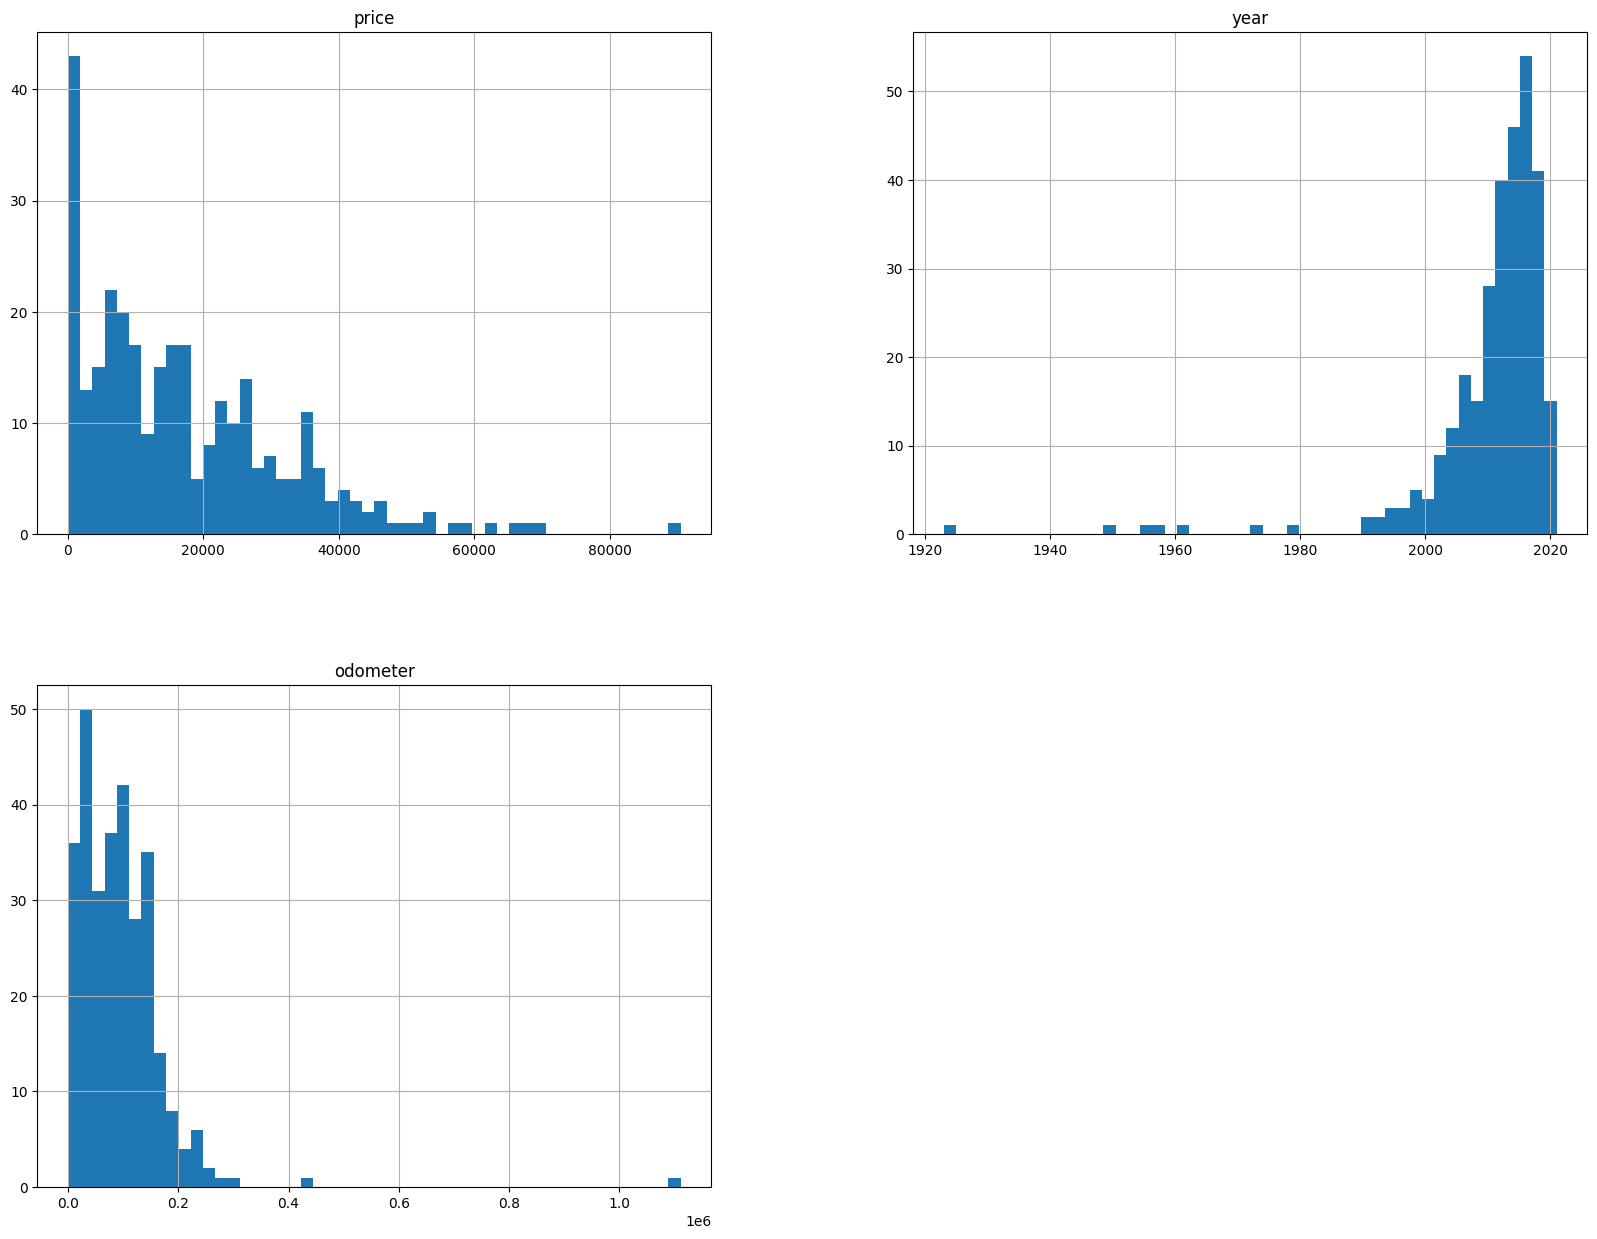

In [84]:
#histogram to visualize all numeric feature
dataSet_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

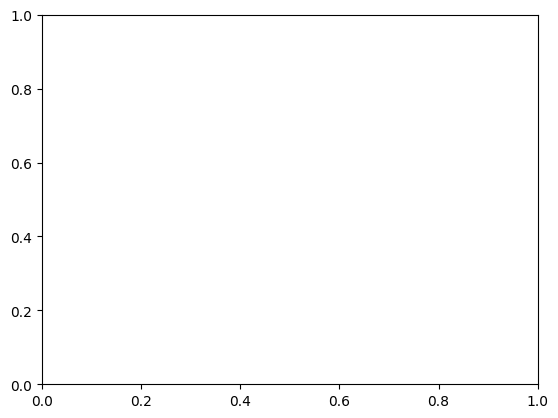

In [99]:
dataSet_cleaned.plot(kind="scatter", x="long", y="lat")

In [60]:
def split_train_test(data, test_ratio):
  "splits the data"
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [89]:
 train_set, test_set = train_test_split(dataSet_cleaned, test_size=0.2, random_state=22)
 print(len(train_set))
 print(len(test_set))
 test_set.head()

243
61


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
111,bozeman,32995,2015.0,ram,diesel cummins 3500,like new,6 cylinders,diesel,157967.0,clean,automatic,4wd,truck,white,mt,45.777.152,-108.553.946
56,asheville,12988,2015.0,jeep,cherokee sport,NaN,NaN,gas,103786.0,clean,automatic,NaN,other,grey,nc,3.480.145,-8.242.621
303,harrisburg,3995,2008.0,hyundai,elantra,NaN,NaN,gas,162000.0,clean,automatic,fwd,NaN,NaN,pa,401.553,-766.025
256,san luis obispo,9995,2012.0,buick,enclave,NaN,NaN,gas,136877.0,clean,automatic,fwd,SUV,white,ca,354.991,-12.068.236
41,joplin,6800,2006.0,ford,f550 reg cab 12' flat bed,NaN,NaN,gas,122000.0,clean,automatic,rwd,NaN,NaN,mo,3.707.851,-94.613.757
